https://drsimonj.svbtle.com/running-a-model-on-separate-groups

In [2]:
library(broom)
library(dplyr)
library(tibble)
library(tidyr)
library(ggplot2)
library(purrr)

In [16]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [21]:
mtcars %>% head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [24]:
x = mtcars %>% nest(-cyl)
print(x)
x$data

# A tibble: 3 x 2
    cyl               data
  <dbl>             <list>
1     6  <tibble [7 x 10]>
2     4 <tibble [11 x 10]>
3     8 <tibble [14 x 10]>


mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
21.0,160.0,110,3.90,2.620,16.46,0,1,4,4
21.0,160.0,110,3.90,2.875,17.02,0,1,4,4
21.4,258.0,110,3.08,3.215,19.44,1,0,3,1
18.1,225.0,105,2.76,3.460,20.22,1,0,3,1
19.2,167.6,123,3.92,3.440,18.30,1,0,4,4
17.8,167.6,123,3.92,3.440,18.90,1,0,4,4
19.7,145.0,175,3.62,2.770,15.50,0,1,5,6
mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,108.0,93,3.85,2.320,18.61,1,1,4,1
24.4,146.7,62,3.69,3.190,20.00,1,0,4,2


In [26]:
x = mtcars %>% nest(-cyl, -am)
print(x)
x$data

# A tibble: 6 x 3
    cyl    am              data
  <dbl> <dbl>            <list>
1     6     1  <tibble [3 x 9]>
2     4     1  <tibble [8 x 9]>
3     6     0  <tibble [4 x 9]>
4     8     0 <tibble [12 x 9]>
5     4     0  <tibble [3 x 9]>
6     8     1  <tibble [2 x 9]>


mpg,disp,hp,drat,wt,qsec,vs,gear,carb
21.0,160,110,3.90,2.620,16.46,0,4,4
21.0,160,110,3.90,2.875,17.02,0,4,4
19.7,145,175,3.62,2.770,15.50,0,5,6
mpg,disp,hp,drat,wt,qsec,vs,gear,carb
22.8,108.0,93,3.85,2.320,18.61,1,4,1
32.4,78.7,66,4.08,2.200,19.47,1,4,1
30.4,75.7,52,4.93,1.615,18.52,1,4,2
33.9,71.1,65,4.22,1.835,19.90,1,4,1
27.3,79.0,66,4.08,1.935,18.90,1,4,1
26.0,120.3,91,4.43,2.140,16.70,0,5,2


In [31]:
x = 
    mtcars %>% 
    nest(-cyl) %>% 
    mutate(fit = map(data, ~ t.test(.$mpg)))

print(x)
x$fit

# A tibble: 3 x 3
    cyl               data         fit
  <dbl>             <list>      <list>
1     6  <tibble [7 x 10]> <S3: htest>
2     4 <tibble [11 x 10]> <S3: htest>
3     8 <tibble [14 x 10]> <S3: htest>


[[1]]

	One Sample t-test

data:  .$mpg
t = 35.936, df = 6, p-value = 3.097e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 18.39853 21.08718
sample estimates:
mean of x 
 19.74286 


[[2]]

	One Sample t-test

data:  .$mpg
t = 19.609, df = 10, p-value = 2.603e-09
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 23.63389 29.69338
sample estimates:
mean of x 
 26.66364 


[[3]]

	One Sample t-test

data:  .$mpg
t = 22.07, df = 13, p-value = 1.093e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 13.62187 16.57813
sample estimates:
mean of x 
     15.1 



In [33]:
x =
  mtcars %>% 
  nest(-cyl) %>% 
  mutate(fit = map(data, ~ t.test(.$mpg)),
         p   = map_dbl(fit, "p.value"))

print(x)

# A tibble: 3 x 4
    cyl               data         fit            p
  <dbl>             <list>      <list>        <dbl>
1     6  <tibble [7 x 10]> <S3: htest> 3.096529e-08
2     4 <tibble [11 x 10]> <S3: htest> 2.602733e-09
3     8 <tibble [14 x 10]> <S3: htest> 1.092804e-11


In [35]:
x = 
    mtcars %>% 
    nest(-cyl) %>% 
    mutate(fit = map(data, ~ t.test(.$mpg)),
           results = map(fit, glance))

print(x)

x$results

# A tibble: 3 x 4
    cyl               data         fit              results
  <dbl>             <list>      <list>               <list>
1     6  <tibble [7 x 10]> <S3: htest> <data.frame [1 x 8]>
2     4 <tibble [11 x 10]> <S3: htest> <data.frame [1 x 8]>
3     8 <tibble [14 x 10]> <S3: htest> <data.frame [1 x 8]>


estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
19.74286,35.93552,3.096529e-08,6,18.39853,21.08718,One Sample t-test,two.sided
estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
26.66364,19.60901,2.602733e-09,10,23.63389,29.69338,One Sample t-test,two.sided
estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
15.1,22.06952,1.092804e-11,13,13.62187,16.57813,One Sample t-test,two.sided


# A tibble: 3 x 11
    cyl               data         fit estimate statistic      p.value
  <dbl>             <list>      <list>    <dbl>     <dbl>        <dbl>
1     6  <tibble [7 x 10]> <S3: htest> 19.74286  35.93552 3.096529e-08
2     4 <tibble [11 x 10]> <S3: htest> 26.66364  19.60901 2.602733e-09
3     8 <tibble [14 x 10]> <S3: htest> 15.10000  22.06952 1.092804e-11
# ... with 5 more variables: parameter <dbl>, conf.low <dbl>, conf.high <dbl>,
#   method <fctr>, alternative <fctr>


[1] "cyl"         "data"        "fit"         "estimate"    "statistic"  
 [6] "p.value"     "parameter"   "conf.low"    "conf.high"   "method"     
[11] "alternative"

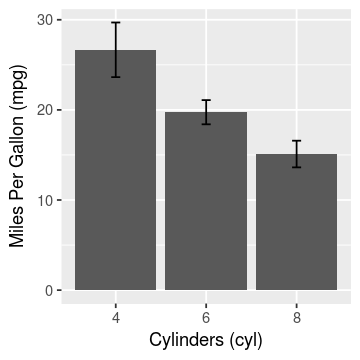

In [55]:
x = 
    mtcars %>% 
    nest(-cyl) %>% 
    mutate(fit = map(data, ~ t.test(.$mpg)),
           results = map(fit, glance)) %>% 
    unnest(results)

print(x)

colnames(x)

options(repr.plot.width = 3, repr.plot.height = 3)

x %>% 
    ggplot(aes(x = factor(cyl), y = estimate)) +
    geom_bar(stat = "identity") +
    geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = .1) +
    labs(x = "Cylinders (cyl)", y = "Miles Per Gallon (mpg)")

# A tibble: 3 x 4
    cyl               data      fit                results
  <dbl>             <list>   <list>                 <list>
1     6  <tibble [7 x 10]> <S3: lm>  <data.frame [7 x 11]>
2     4 <tibble [11 x 10]> <S3: lm> <data.frame [11 x 11]>
3     8 <tibble [14 x 10]> <S3: lm> <data.frame [14 x 11]>
# A tibble: 32 x 12
     cyl   mpg    hp    wt  disp  .fitted   .se.fit     .resid      .hat
   <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>     <dbl>      <dbl>     <dbl>
 1     6  21.0   110 2.620 160.0 21.43923 0.8734029 -0.4392256 0.6486848
 2     6  21.0   110 2.875 160.0 20.44570 0.6760327  0.5543010 0.3886332
 3     6  21.4   110 3.215 258.0 20.69886 0.9595681  0.7011436 0.7829898
 4     6  18.1   105 3.460 225.0 19.26783 0.6572258 -1.1678250 0.3673108
 5     6  19.2   123 3.440 167.6 18.22410 0.7031674  0.9758992 0.4204573
 6     6  17.8   123 3.440 167.6 18.22410 0.7031674 -0.4241008 0.4204573
 7     6  19.7   175 2.770 145.0 19.90019 1.0688377 -0.2001924 0.9714668
 8     4  

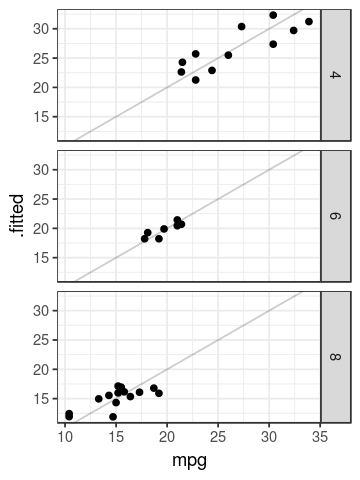

In [11]:
x = 
    mtcars %>% 
    nest(-cyl) %>% 
    mutate(fit = map(data, ~ lm(mpg ~ hp + wt + disp, data = .)),
           results = map(fit, augment))

print(x)

y = x %>% unnest(results)
print(y)

options(repr.plot.width = 3, repr.plot.height = 4)

y %>% 
    ggplot(aes(x = mpg, y = .fitted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, alpha = .2) +
    facet_grid(cyl ~ .) +
    theme_bw()